# Эксперимент Майкельсона

Опыты Майкельсона — класс физических экспериментов, исследующих зависимость скорости распространения света от направления.

Проверим данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений на нормальность.



In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns

In [3]:
speed = np.loadtxt('./speed.txt')

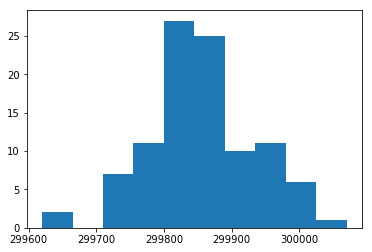

In [5]:
_ = plt.hist(speed)

(299616.5564925634, 300088.24350743665)

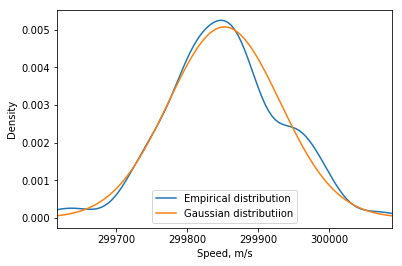

In [6]:
sns.distplot(speed, hist=False, label='Empirical distribution')
x = np.arange(min(speed)-1000, max(speed)+1000, 1)
plt.plot(x, st.distributions.norm(np.mean(speed), np.std(speed)).pdf(x), label='Gaussian distributiion')
plt.legend(loc='best')
plt.xlabel('Speed, m/s')
plt.ylabel('Density')
plt.xlim(np.mean(speed)-3*np.std(speed), np.mean(speed)+3*np.std(speed))

(299616.5564925634, 300088.24350743665)

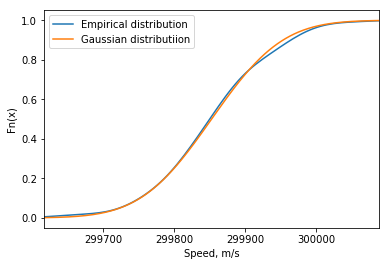

In [7]:
sns.distplot(speed, hist=False,             
             kde_kws=dict(cumulative=True), label='Empirical distribution')
x = np.arange(min(speed)-1000, max(speed)+1000, 1)
plt.plot(x, st.distributions.norm(np.mean(speed), np.std(speed)).cdf(x), label='Gaussian distributiion')
plt.legend(loc='best')
plt.xlabel('Speed, m/s')
plt.ylabel('Fn(x)')
plt.xlim(np.mean(speed)-3*np.std(speed), np.mean(speed)+3*np.std(speed))


q-q plot

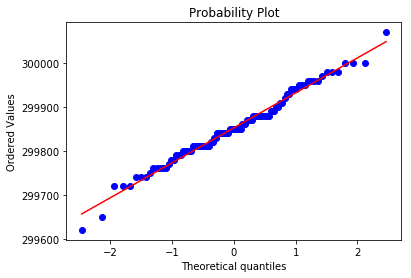

In [8]:
qq_points, qq_line =st.probplot(speed, plot=plt)

Критерии Колмогорова (Лиллиефорса):

In [9]:
from statsmodels.stats.diagnostic import kstest_normal
kstest_normal(speed, dist='norm', pvalmethod='approx')

(0.08342437427409632, 0.08289042847559838)

Критерий Шапиро-Уилка

In [11]:
st.shapiro(speed)

(0.9880793690681458, 0.5140784382820129)

Критерий Харке-Бера

In [13]:
st.jarque_bera(speed)

(0.29492498111997556, 0.8628948044152577)

**Michelson A.A. Experimental determination of the velocity of light made at the U.S. Naval Academy, Annapolis. Astronomical Papers, 1, 109-145, 1880.**

Ноутбук основан на R-ноутбуках курсов К.В. Воронцова и Е.А. Рябенко